In [1]:
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


In [2]:
DATA_DIR='/home/HDD6TB/datasets/emotions/EmotiW/engagement/'

In [3]:
import os
from PIL import Image
import cv2
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn import svm,metrics,preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import mord

from collections import defaultdict
import os
import random
import numpy as np
from tqdm import tqdm
import time
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
compare_filenames=lambda x: int(os.path.splitext(x)[0])

# Feature extraction

In [5]:
import pathlib
import tensorflow as tf
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.layers import TimeDistributed, GRU, Dense, Dropout, Flatten, LSTM, Activation, MaxPooling2D
from tensorflow.keras.regularizers import l2 as L2_reg
from tensorflow.keras.layers import Conv2D, BatchNormalization, \
    MaxPool2D, GlobalMaxPool2D, Input, Masking, Conv3D, MaxPooling3D, GlobalMaxPool3D
from tensorflow.keras.optimizers import SGD, Adam

print(tf.__version__)
from tensorflow.compat.v1.keras.backend import set_session 
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess=tf.compat.v1.Session(config=config)
set_session(sess)

2.4.1


## Extract frames

In [21]:
def process_dir(dirname):
    print(dirname)
    resdir=os.path.join(DATA_DIR,'frames')
    d=os.path.join(DATA_DIR,dirname)
    for filename in tqdm(os.listdir(d)):
        if filename.lower().endswith('ini'):
            continue
        if os.path.isdir(os.path.join(d,filename)):
            videofile=None
            for fn in os.listdir(os.path.join(d,filename)):
                if fn.lower().endswith('ini'):
                    continue
                videofile=fn
            if videofile is None:
                print(filename)
                continue
            filename=os.path.join(filename,videofile)
        fn, ext = os.path.splitext(os.path.basename(filename))
        outdir=os.path.join(resdir,dirname,fn)
        if not os.path.exists(outdir):
            os.makedirs(outdir)
        command = "ffmpeg -r 1 -i "+os.path.join(d,filename) + " -r 1 '"+outdir+"/%05d.png'"
        print(command)
        os.system(command=command)

#process_dir('validation')
process_dir('Train')

Train


  0%|          | 0/148 [00:00<?, ?it/s]

ffmpeg -r 1 -i /home/HDD6TB/datasets/emotions/EmotiW/engagement/Train/subject_43_Vid_7.avi -r 1 '/home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/Train/subject_43_Vid_7/%05d.png'
ffmpeg -r 1 -i /home/HDD6TB/datasets/emotions/EmotiW/engagement/Train/subject_41_Vid_7.avi -r 1 '/home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/Train/subject_41_Vid_7/%05d.png'
ffmpeg -r 1 -i /home/HDD6TB/datasets/emotions/EmotiW/engagement/Train/subject_66_Vid_6.wmv -r 1 '/home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/Train/subject_66_Vid_6/%05d.png'
ffmpeg -r 1 -i /home/HDD6TB/datasets/emotions/EmotiW/engagement/Train/subject_70_Vid_2.avi -r 1 '/home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/Train/subject_70_Vid_2/%05d.png'
ffmpeg -r 1 -i /home/HDD6TB/datasets/emotions/EmotiW/engagement/Train/subject_80_Vid_2.avi -r 1 '/home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/Train/subject_80_Vid_2/%05d.png'
ffmpeg -r 1 -i /home/HDD6TB/datasets/emotions/EmotiW/engagement/Train/

ffmpeg -r 1 -i /home/HDD6TB/datasets/emotions/EmotiW/engagement/Train/subject_85_Vid_7.avi -r 1 '/home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/Train/subject_85_Vid_7/%05d.png'
ffmpeg -r 1 -i /home/HDD6TB/datasets/emotions/EmotiW/engagement/Train/subject_26_Vid_5.avi -r 1 '/home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/Train/subject_26_Vid_5/%05d.png'
ffmpeg -r 1 -i /home/HDD6TB/datasets/emotions/EmotiW/engagement/Train/subject_68_Vid_6.wmv -r 1 '/home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/Train/subject_68_Vid_6/%05d.png'
ffmpeg -r 1 -i /home/HDD6TB/datasets/emotions/EmotiW/engagement/Train/subject_30_Vid_3.avi -r 1 '/home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/Train/subject_30_Vid_3/%05d.png'
ffmpeg -r 1 -i /home/HDD6TB/datasets/emotions/EmotiW/engagement/Train/subject_53_Vid_2.avi -r 1 '/home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/Train/subject_53_Vid_2/%05d.png'
ffmpeg -r 1 -i /home/HDD6TB/datasets/emotions/EmotiW/engagement/Train/

ffmpeg -r 1 -i /home/HDD6TB/datasets/emotions/EmotiW/engagement/Train/subject_77_Vid_2.avi -r 1 '/home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/Train/subject_77_Vid_2/%05d.png'
ffmpeg -r 1 -i /home/HDD6TB/datasets/emotions/EmotiW/engagement/Train/subject_29_Vid_6.wmv -r 1 '/home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/Train/subject_29_Vid_6/%05d.png'
ffmpeg -r 1 -i /home/HDD6TB/datasets/emotions/EmotiW/engagement/Train/subject_30_Vid_1.avi -r 1 '/home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/Train/subject_30_Vid_1/%05d.png'
ffmpeg -r 1 -i /home/HDD6TB/datasets/emotions/EmotiW/engagement/Train/subject_34_Vid_7.webm -r 1 '/home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/Train/subject_34_Vid_7/%05d.png'
ffmpeg -r 1 -i /home/HDD6TB/datasets/emotions/EmotiW/engagement/Train/subject_80_Vid_3.avi -r 1 '/home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/Train/subject_80_Vid_3/%05d.png'
ffmpeg -r 1 -i /home/HDD6TB/datasets/emotions/EmotiW/engagement/Train

ffmpeg -r 1 -i /home/HDD6TB/datasets/emotions/EmotiW/engagement/Train/subject_34_Vid_4.webm -r 1 '/home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/Train/subject_34_Vid_4/%05d.png'
ffmpeg -r 1 -i /home/HDD6TB/datasets/emotions/EmotiW/engagement/Train/subject_45_Vid_7.webm -r 1 '/home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/Train/subject_45_Vid_7/%05d.png'
ffmpeg -r 1 -i /home/HDD6TB/datasets/emotions/EmotiW/engagement/Train/subject_29_Vid_7.wmv -r 1 '/home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/Train/subject_29_Vid_7/%05d.png'
ffmpeg -r 1 -i /home/HDD6TB/datasets/emotions/EmotiW/engagement/Train/subject_76_Vid_7.wmv -r 1 '/home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/Train/subject_76_Vid_7/%05d.png'
ffmpeg -r 1 -i /home/HDD6TB/datasets/emotions/EmotiW/engagement/Train/subject_84_Vid_1.avi -r 1 '/home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/Train/subject_84_Vid_1/%05d.png'
ffmpeg -r 1 -i /home/HDD6TB/datasets/emotions/EmotiW/engagement/Trai

In [12]:
! find /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/ -empty -type d -delete

In [7]:
print(sorted(os.listdir(os.path.join(DATA_DIR,'frames/validation/subject_9_Vid_6')), key=compare_filenames)[-10:])

['9865.png', '9866.png', '9867.png', '9868.png', '9869.png', '9870.png', '9871.png', '9872.png', '9873.png', '9874.png']


In [ ]:
def extract_openface_features(dirname,outdir):
    print(dirname)
    if not os.path.exists(outdir):
        os.makedirs(outdir)
    os.chdir(dirname)
    command='/home/avsavchenko/src/distr/OpenFace/build/bin/FeatureExtraction -pose -aus -gaze -out_dir '+outdir
    for filename in os.listdir('.'):
        if filename.lower().endswith('ini'):
            continue
        
        if os.path.isdir(filename):
            command+=' -fdir '+filename
        
    print(command)
    os.system(command=command)

cur_dir=os.getcwd()
extract_openface_features(os.path.join(DATA_DIR,'frames/validation/'),os.path.join(DATA_DIR,'frames/faces/openface/validation/'))
extract_openface_features(os.path.join(DATA_DIR,'frames/Train/'),os.path.join(DATA_DIR,'frames/faces/openface/Train/'))
os.chdir(cur_dir)
print(os.getcwd())

/home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/
/home/avsavchenko/src/distr/OpenFace/build/bin/FeatureExtraction -pose -aus -gaze -out_dir /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/faces/openface/validation/ -fdir subject_7_Vid_5 -fdir subject_9_Vid_6 -fdir subject_13_Vid_6 -fdir subject_8_Vid_6 -fdir subject_7_Vid_3 -fdir subject_20_Vid_5 -fdir subject_7_Vid_2 -fdir subject_1_Vid_2 -fdir subject_5_Vid_6 -fdir subject_11_Vid_6 -fdir subject_1_Vid_4 -fdir subject_1_Vid_3 -fdir subject_20_Vid_5_1 -fdir subject_18_Vid_6 -fdir subject_22_Vid_5 -fdir subject_3_Vid_2 -fdir subject_20_Vid_7 -fdir subject_16_Vid_6 -fdir subject_20_Vid_6 -fdir subject_7_Vid_4 -fdir subject_31_Vid_6 -fdir subject_3_Vid_1 -fdir subject_6_Vid_6 -fdir subject_14_Vid_6 -fdir subject_20_Vid_5_2 -fdir subject_3_Vid_6 -fdir subject_20_Vid_3 -fdir subject_3_Vid_5 -fdir subject_1_Vid_5 -fdir subject_12_Vid_6 -fdir subject_3_Vid_3 -fdir subject_3_Vid_7 -fdir subject_20_Vid_2 -fdir subject

## Detect faces in frames

In [6]:
from facial_analysis import FacialImageProcessing
imgProcessing=FacialImageProcessing(False)

In [ ]:
INPUT_SIZE = (224,224)
def save_faces(source_path,save_path):
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    for folder in tqdm(os.listdir(source_path)):
        if not os.path.exists(os.path.join(save_path, folder)):
            os.mkdir(os.path.join(save_path, folder))

            for image in os.listdir(os.path.join(source_path, folder)):
                filename = os.path.join(source_path, folder, image)
                frame_bgr = cv2.imread(filename)
                frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
                bounding_boxes, _ = imgProcessing.detect_faces(frame)

                if len(bounding_boxes)==0:
                    print('No faces found for ',filename)
                    face_img = frame_bgr
                    faceFound='noface'
                else:
                    if len(bounding_boxes)>1:
                        print('Too many faces (',len(bounding_boxes),') found for ',filename)
                        bounding_boxes=bounding_boxes[:1]

                    b=[int(bi) for bi in bounding_boxes[0]]
                    x1,y1,x2,y2=b[0:4]
                    face_img=frame_bgr[y1:y2,x1:x2,:]

                    if np.prod(face_img.shape)==0:
                        print('Empty face ',b,' found for ',filename)
                        continue
                    
                    faceFound=''

                #face_img=cv2.resize(face_img,INPUT_SIZE)
                root,ext=os.path.splitext(image)
                cv2.imwrite(os.path.join(save_path, folder, root+faceFound+ext), face_img) 
        else:
            print(folder)
        
save_faces(os.path.join(DATA_DIR,'frames/validation'),os.path.join(DATA_DIR,'frames/faces/mtcnn_cropped/validation/'))
save_faces(os.path.join(DATA_DIR,'frames/Train'),os.path.join(DATA_DIR,'frames/faces/mtcnn_cropped/Train/'))

#### Aligned

In [7]:
import numpy as np
import cv2
import math
from skimage import transform as trans
def get_iou(bb1, bb2):
    """
    Calculate the Intersection over Union (IoU) of two bounding boxes.

    Parameters
    ----------
    bb1 : array
        order: {'x1', 'y1', 'x2', 'y2'}
        The (x1, y1) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner
    bb2 : array
        order: {'x1', 'y1', 'x2', 'y2'}
        The (x1, y1) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner

    Returns
    -------
    float
        in [0, 1]
    """

    # determine the coordinates of the intersection rectangle
    x_left = max(bb1[0], bb2[0])
    y_top = max(bb1[1], bb2[1])
    x_right = min(bb1[2], bb2[2])
    y_bottom = min(bb1[3], bb2[3])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    # The intersection of two axis-aligned bounding boxes is always an
    # axis-aligned bounding box
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # compute the area of both AABBs
    bb1_area = (bb1[2] - bb1[0]) * (bb1[3] - bb1[1])
    bb2_area = (bb2[2] - bb2[0]) * (bb2[3] - bb2[1])

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    return iou

#print(get_iou([10,10,20,20],[15,15,25,25]))

def preprocess(img, bbox=None, landmark=None, **kwargs):
    M = None
    image_size = [224,224]
    src = np.array([
      [30.2946, 51.6963],
      [65.5318, 51.5014],
      [48.0252, 71.7366],
      [33.5493, 92.3655],
      [62.7299, 92.2041] ], dtype=np.float32 )
    if image_size[1]==224:
        src[:,0] += 8.0
    src*=2
    if landmark is not None:
        dst = landmark.astype(np.float32)

        tform = trans.SimilarityTransform()
        #dst=dst[:3]
        #src=src[:3]
        #print(dst.shape,src.shape,dst,src)
        tform.estimate(dst, src)
        M = tform.params[0:2,:]
        #M = cv2.estimateRigidTransform( dst.reshape(1,5,2), src.reshape(1,5,2), False)
        #print(M)

    if M is None:
        if bbox is None: #use center crop
            det = np.zeros(4, dtype=np.int32)
            det[0] = int(img.shape[1]*0.0625)
            det[1] = int(img.shape[0]*0.0625)
            det[2] = img.shape[1] - det[0]
            det[3] = img.shape[0] - det[1]
        else:
              det = bbox
        margin = kwargs.get('margin', 44)
        bb = np.zeros(4, dtype=np.int32)
        bb[0] = np.maximum(det[0]-margin//2, 0)
        bb[1] = np.maximum(det[1]-margin//2, 0)
        bb[2] = np.minimum(det[2]+margin//2, img.shape[1])
        bb[3] = np.minimum(det[3]+margin//2, img.shape[0])
        ret = img[bb[1]:bb[3],bb[0]:bb[2],:]
        if len(image_size)>0:
              ret = cv2.resize(ret, (image_size[1], image_size[0]))
        return ret 
    else: #do align using landmark
        assert len(image_size)==2
        warped = cv2.warpAffine(img,M,(image_size[1],image_size[0]), borderValue = 0.0)
        return warped


/home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_8_Vid_6/5205.png


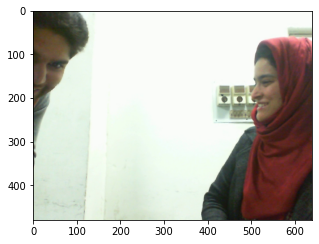

<Figure size 360x360 with 0 Axes>

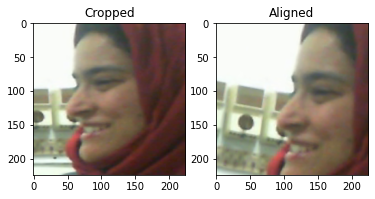

<Figure size 360x360 with 0 Axes>

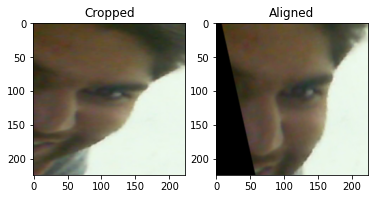

In [8]:
fpath=os.path.join(DATA_DIR,'frames/validation/subject_8_Vid_6/5205.png')
print(fpath)
frame_bgr=cv2.imread(fpath)
plt.figure(figsize=(5, 5))
frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(frame)
bounding_boxes, points = imgProcessing.detect_faces(frame)
points = points.T
for bbox,p in zip(bounding_boxes, points):
    box = bbox.astype(np.int)
    x1,y1,x2,y2=box[0:4]    
    #face_img=frame[y1:y2,x1:x2,:]

    #face_img=extract_image_chip(frame,p)
    p = p.reshape((2,5)).T
        
    plt.figure(figsize=(5, 5))
    fig, (ax1, ax2) = plt.subplots(1, 2)
    face_img=preprocess(frame,box,None) #p)
    ax1.set_title('Cropped')
    ax1.imshow(face_img)
    
    face_img=preprocess(frame,box,p)
    ax2.set_title('Aligned')
    ax2.imshow(face_img)

In [ ]:
def save_aligned_faces(source_path,save_path):
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    for folder in tqdm(os.listdir(source_path)):
        if not os.path.exists(os.path.join(save_path, folder)):
            os.mkdir(os.path.join(save_path, folder))

            prev_b = None
            counter = 0

            for image in sorted(os.listdir(os.path.join(source_path, folder))):
                filename = os.path.join(source_path, folder, image)
                frame = cv2.imread(filename)
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                bounding_boxes, points = imgProcessing.detect_faces(frame)
                points = points.T

                best_ind=None
                if len(bounding_boxes)==0:
                    print('No faces found for ',filename)
                    counter+=1
                    if prev_b is None or counter>3:
                        continue
                    else:
                        b=prev_b
                elif len(bounding_boxes)>1:
                    print('Too many faces (',len(bounding_boxes),') found for ',filename)
                    if prev_b is None:
                        #continue
                        best_ind=0
                        b=[int(bi) for bi in bounding_boxes[best_ind]]
                        counter=0
                    else:
                        best_iou=0
                        for i in range(len(bounding_boxes)):
                            iou=get_iou(bounding_boxes[i],prev_b)
                            if iou>best_iou:
                                best_iou=iou
                                best_ind=i
                        if best_iou>0:
                            b=[int(bi) for bi in bounding_boxes[best_ind]]
                            print('best_iou (',best_iou,') best_bb ',bounding_boxes[best_ind])
                        else:
                            #continue
                            best_ind=0
                            b=[int(bi) for bi in bounding_boxes[best_ind]]
                            counter=0
                else:
                    best_ind=0
                    b=[int(bi) for bi in bounding_boxes[best_ind]]
                    counter=0
                prev_b=b

                if True:
                    p=None
                    if best_ind is not None:
                        p=points[best_ind]
                        if True: #not USE_RETINA_FACE:
                            p = p.reshape((2,5)).T
                    face_img=preprocess(frame,b,None) #p)
                else:
                    x1,y1,x2,y2=b[0:4]
                    face_img=frame[y1:y2,x1:x2,:]
                if np.prod(face_img.shape)==0:
                    print('Empty face ',b,' found for ',filename)
                    continue

                cv2.imwrite(os.path.join(save_path, folder, image), cv2.cvtColor(face_img, cv2.COLOR_RGB2BGR)) 

#aligned
save_aligned_faces(os.path.join(DATA_DIR,'frames/validation'),os.path.join(DATA_DIR,'frames/faces/mtcnn_aligned/validation/'))
save_aligned_faces(os.path.join(DATA_DIR,'frames/Train'),os.path.join(DATA_DIR,'frames/faces/mtcnn_aligned/Train/'))

  2%|▏         | 1/48 [07:19<5:44:17, 439.51s/it]

No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_9_Vid_6/3872.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_9_Vid_6/3875.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_9_Vid_6/4014.png
Too many faces ( 2 ) found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_9_Vid_6/5358.png
best_iou ( 0.9471880698414126 ) best_bb  [572.98185583 226.7768269  780.16819629 487.71917295   0.99999952]
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_9_Vid_6/6248.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_9_Vid_6/6249.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_9_Vid_6/6250.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_9

No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_9_Vid_6/9375.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_9_Vid_6/9376.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_9_Vid_6/9377.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_9_Vid_6/9378.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_9_Vid_6/9379.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_9_Vid_6/9380.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_9_Vid_6/9381.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_9_Vid_6/9382.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_9_Vid_6/9

  4%|▍         | 2/48 [31:48<13:21:09, 1044.99s/it]

No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_13_Vid_6/6139.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_13_Vid_6/6140.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_13_Vid_6/6141.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_13_Vid_6/6142.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_13_Vid_6/6143.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_13_Vid_6/6144.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_13_Vid_6/6145.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_13_Vid_6/6146.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_1

No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_13_Vid_6/6214.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_13_Vid_6/6241.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_13_Vid_6/6242.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_13_Vid_6/6243.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_13_Vid_6/6244.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_13_Vid_6/6245.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_13_Vid_6/6246.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_13_Vid_6/6247.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_1

No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_13_Vid_6/9590.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_13_Vid_6/9591.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_13_Vid_6/9592.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_13_Vid_6/9593.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_13_Vid_6/9594.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_13_Vid_6/9595.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_13_Vid_6/9596.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_13_Vid_6/9597.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_1

  6%|▋         | 3/48 [54:34<14:53:41, 1191.59s/it]

Too many faces ( 2 ) found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_8_Vid_6/001.png
Too many faces ( 2 ) found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_8_Vid_6/002.png
best_iou ( 0.9662958927908569 ) best_bb  [419.23013496 167.00970982 513.89385736 291.49962235   0.99997401]
Too many faces ( 2 ) found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_8_Vid_6/003.png
best_iou ( 0.9771144710104013 ) best_bb  [418.70447123 166.44306989 514.01146936 291.60703207   0.99998057]
Too many faces ( 2 ) found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_8_Vid_6/004.png
best_iou ( 0.9090387998772003 ) best_bb  [421.74396555 170.41334489 514.97912046 292.28668091   0.99999154]
Too many faces ( 2 ) found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_8_Vid_6/005.png
best_iou ( 0.9625298419359716 ) best_bb  [421.84993768 171.05

Too many faces ( 2 ) found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_8_Vid_6/039.png
best_iou ( 0.9705252442403519 ) best_bb  [419.25724655 166.7678715  513.48420137 289.48277941   0.99999654]
Too many faces ( 2 ) found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_8_Vid_6/040.png
best_iou ( 0.9450818814799892 ) best_bb  [421.7628605  168.80041981 513.20437348 289.1899178    0.99996388]
Too many faces ( 2 ) found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_8_Vid_6/041.png
best_iou ( 0.9540020455301449 ) best_bb  [418.248555   168.82672989 512.88532495 290.18258694   0.99999702]
Too many faces ( 2 ) found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_8_Vid_6/042.png
best_iou ( 0.9277426387528557 ) best_bb  [421.95865536 168.54471551 514.52837157 290.13681214   0.99996638]
Too many faces ( 2 ) found for  /home/HDD6TB/datasets/emotions/EmotiW/engage

Too many faces ( 2 ) found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_8_Vid_6/5193.png
best_iou ( 0.917688964195378 ) best_bb  [488.68987811 120.64086393 577.2203517  244.79577036   0.99932492]
Too many faces ( 2 ) found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_8_Vid_6/5205.png
best_iou ( 0.9271277361159475 ) best_bb  [493.80233039 120.60871249 586.52990787 247.48019699   0.99944431]
Too many faces ( 2 ) found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_8_Vid_6/5233.png
best_iou ( 0.8956475418815156 ) best_bb  [480.94387597 118.48513627 586.1561904  258.51671311   0.99950194]


 10%|█         | 5/48 [1:09:34<8:47:23, 735.89s/it] 

No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_20_Vid_5/001.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_20_Vid_5/002.png


 17%|█▋        | 8/48 [1:28:35<5:35:15, 502.88s/it]

No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_5_Vid_6/10313.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_5_Vid_6/10314.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_5_Vid_6/9083.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_5_Vid_6/9084.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_5_Vid_6/9085.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_5_Vid_6/9086.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_5_Vid_6/9087.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_5_Vid_6/9088.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_5_Vid_6

 19%|█▉        | 9/48 [1:54:30<9:00:39, 831.77s/it]

Too many faces ( 2 ) found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_11_Vid_6/10391.png
best_iou ( 0.9249182511002026 ) best_bb  [449.78973572 162.672832   687.67982236 477.50445809   0.99998832]
Too many faces ( 2 ) found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_11_Vid_6/10418.png
best_iou ( 0.9621441131758565 ) best_bb  [401.78060167 157.25702196 625.12577363 450.94351629   0.99885857]
Too many faces ( 2 ) found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_11_Vid_6/10419.png
best_iou ( 0.9587100153266698 ) best_bb  [402.76675332 154.25241512 627.60119878 454.03319224   0.99874216]
Too many faces ( 2 ) found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_11_Vid_6/10440.png
best_iou ( 0.21404679093588377 ) best_bb  [409.13005602 152.87111628 636.72238916 452.00618558   0.9991861 ]


 21%|██        | 10/48 [2:22:52<11:37:02, 1100.60s/it]

Too many faces ( 2 ) found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_1_Vid_4/4493.png
best_iou ( 0.8916502451561565 ) best_bb  [242.33536394 180.46568053 409.77293377 386.42049263   0.99998331]


 25%|██▌       | 12/48 [2:38:59<7:48:38, 781.06s/it]  

Too many faces ( 2 ) found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_20_Vid_5_1/1443.png
best_iou ( 0.974463721602709 ) best_bb  [319.78170794 191.22717166 452.52242629 348.1462993    0.99999964]
Too many faces ( 2 ) found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_20_Vid_5_1/1444.png
best_iou ( 0.9292930806316935 ) best_bb  [314.89314783 188.34928352 449.93272483 349.75343826   0.99999964]
Too many faces ( 2 ) found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_20_Vid_5_1/1469.png
best_iou ( 0.9238376531954883 ) best_bb  [311.09270388 193.26144767 455.95128402 364.99257526   0.99999404]
Too many faces ( 2 ) found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_20_Vid_5_1/198.png
best_iou ( 0.8983544260000854 ) best_bb  [324.58427987 193.42959128 450.36991522 347.09573748   1.        ]
Too many faces ( 2 ) found for  /home/HDD6TB/datasets/emotions

 27%|██▋       | 13/48 [2:46:22<6:36:02, 678.93s/it]

Too many faces ( 2 ) found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_18_Vid_6/10667.png
best_iou ( 0.9448786010075205 ) best_bb  [518.89193526 335.08599949 707.24555483 558.73805253   0.99994171]
Too many faces ( 2 ) found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_18_Vid_6/10675.png
best_iou ( 0.8931386452370419 ) best_bb  [531.59407306 336.72417632 709.21869969 548.4732752    0.99997771]
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_18_Vid_6/1118.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_18_Vid_6/1127.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_18_Vid_6/1128.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_18_Vid_6/1129.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/vali

No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_18_Vid_6/210.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_18_Vid_6/211.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_18_Vid_6/212.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_18_Vid_6/213.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_18_Vid_6/214.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_18_Vid_6/215.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_18_Vid_6/216.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_18_Vid_6/217.png
No faces found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_18_Vid_6/

 29%|██▉       | 14/48 [3:14:26<9:16:38, 982.32s/it]

Too many faces ( 2 ) found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_22_Vid_5/001.png
Too many faces ( 2 ) found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_22_Vid_5/002.png
best_iou ( 0.9755642849333136 ) best_bb  [351.82750881  83.92012402 476.42598044 245.11423119   0.99999869]
Too many faces ( 2 ) found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_22_Vid_5/003.png
best_iou ( 0.9769086323482605 ) best_bb  [350.92161971  85.48593499 476.45632356 245.59962085   0.99999845]
Too many faces ( 2 ) found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_22_Vid_5/004.png
best_iou ( 0.9782586279960757 ) best_bb  [351.26829466  85.63422534 476.97379977 245.03622438   0.99999809]
Too many faces ( 2 ) found for  /home/HDD6TB/datasets/emotions/EmotiW/engagement/frames/validation/subject_22_Vid_5/005.png
best_iou ( 0.9640570155542216 ) best_bb  [351.8467069   

 31%|███▏      | 15/48 [3:23:52<7:51:20, 856.99s/it]

## Tensorflow

In [155]:
from tensorflow.keras.applications import mobilenet
from tensorflow.keras.models import load_model,Model

In [156]:
def mobilenet_preprocess_input(x,**kwargs):
    x[..., 0] -= 103.939
    x[..., 1] -= 116.779
    x[..., 2] -= 123.68
    return x

preprocessing_function=mobilenet_preprocess_input

In [157]:
model_name='mobilenet_7'
base_model=load_model('../models/affectnet_emotions/'+model_name+'.h5')
feature_extractor_model=Model(base_model.input,[base_model.get_layer('global_pooling').output,base_model.get_layer('feats').output,base_model.output])
feature_extractor_model.summary()
_,w,h,_=feature_extractor_model.input.shape
print(w,h)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

In [17]:
feature_extractor_model.output

[<KerasTensor: shape=(None, 1024) dtype=float32 (created by layer 'global_pooling')>,
 <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'feats')>,
 <KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'emotion_preds')>]

In [ ]:
def get_features_scores(data_dir):
    filename2features={}
    for filename in tqdm(os.listdir(data_dir)):
        frames_dir=os.path.join(data_dir,filename)
        X_global_features,X_feats,X_scores,X_isface=[],[],[],[]
        imgs=[]
        faces_only=[fn for fn in os.listdir(frames_dir) if 'noface' not in fn]
        for img_name in sorted(faces_only, key=compare_filenames):
            img=cv2.imread(os.path.join(frames_dir,img_name))
            X_isface.append('noface' not in img_name)
                
            if img.size:
                img=cv2.resize(img,(w,h))
                img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                imgs.append(img)
                if len(imgs)>=512:        
                    #inp = preprocessing_function(np.expand_dims(img, axis=0).astype(np.float32))
                    inp = preprocessing_function(np.array(imgs, dtype=np.float32))
                    global_features,feats,scores=feature_extractor_model.predict(inp)
                    #print(global_features.shape,feats.shape,scores.shape)
                    if len(X_feats)==0:
                        X_feats=feats
                        X_global_features=global_features
                        X_scores=scores
                    else:
                        X_feats=np.concatenate((X_feats,feats),axis=0)
                        X_global_features=np.concatenate((X_global_features,global_features),axis=0)
                        X_scores=np.concatenate((X_scores,scores),axis=0)
                    
                    imgs=[]

        if len(imgs)>0:        
            inp = preprocessing_function(np.array(imgs, dtype=np.float32))
            global_features,feats,scores=feature_extractor_model.predict(inp)
            #print(global_features.shape,feats.shape,scores.shape)
            if len(X_feats)==0:
                X_feats=feats
                X_global_features=global_features
                X_scores=scores
            else:
                X_feats=np.concatenate((X_feats,feats),axis=0)
                X_global_features=np.concatenate((X_global_features,global_features),axis=0)
                X_scores=np.concatenate((X_scores,scores),axis=0)

        X_isface=np.array(X_isface)
        #print(X_global_features.shape,X_feats.shape,X_scores.shape)
        filename2features[filename]=(X_global_features,X_feats,X_scores,X_isface)
    return filename2features

filename2features_val=get_features_scores(os.path.join(DATA_DIR,'frames/faces/mtcnn_cropped/validation/')) #mtcnn_aligned
filename2features_train=get_features_scores(os.path.join(DATA_DIR,'frames/faces/mtcnn_cropped/Train/')) #_cropped

 33%|███▎      | 48/147 [1:09:54<1:05:02, 39.42s/it]

## PyTorch

In [6]:
import glob
from itertools import chain
import os
import random
import zipfile

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from PIL import Image
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from tqdm.notebook import tqdm

print(f"Torch: {torch.__version__}")
device = 'cuda'
use_cuda = torch.cuda.is_available()
print(use_cuda)

Torch: 1.7.1+cu110
True


In [7]:
if False:
    model_name='enet_b2_8'
    IMG_SIZE=260 #224 #
else:
    model_name='enet_b0_8_best_afew'
    IMG_SIZE=224
PATH='../models/affectnet_emotions/'+model_name+'.pt'
test_transforms = transforms.Compose(
    [
        transforms.Resize((IMG_SIZE,IMG_SIZE)),
        #transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    ]
)
np_transforms = transforms.Compose(
    [
        transforms.ToPILImage(None),
        transforms.Resize((IMG_SIZE,IMG_SIZE)),
        #transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    ]
)

feature_extractor_model = torch.load(PATH)

In [8]:
if True:
    classifier_weights=feature_extractor_model.classifier[0].weight.cpu().data.numpy()
    classifier_bias=feature_extractor_model.classifier[0].bias.cpu().data.numpy()
else:
    classifier_weights=feature_extractor_model.classifier.weight.cpu().data.numpy()
    classifier_bias=feature_extractor_model.classifier.bias.cpu().data.numpy()
print(classifier_weights.shape,classifier_weights)
print(classifier_bias.shape,classifier_bias)

(8, 1280) [[ 0.00515123 -0.00972202 -0.01203173 ...  0.05333852 -0.06858566
  -0.12183831]
 [ 0.05973773 -0.01306326 -0.00981904 ...  0.04521868  0.03189689
   0.16130415]
 [-0.02749952 -0.1972647   0.02720864 ...  0.18251328 -0.03125019
  -0.07623435]
 ...
 [-0.15567695  0.09653756 -0.02194299 ... -0.07001057  0.00730149
   0.11114535]
 [ 0.08313771 -0.16218805 -0.10610525 ... -0.05499801 -0.00550514
   0.12355816]
 [-0.04981646  0.23458022 -0.16780637 ... -0.24049994  0.02247157
  -0.10648516]]
(8,) [-0.02634053  0.05532073 -0.09343545  0.01225835  0.05623824  0.05436933
 -0.0242617   0.02030101]


In [9]:
feature_extractor_model.classifier=torch.nn.Identity()
feature_extractor_model.eval()

EfficientNet(
  (conv_stem): Conv2dSame(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (bn1): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  (act1): SiLU(inplace=True)
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn1): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
        (act1): SiLU(inplace=True)
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
        )
        (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNorm2d(16, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
        (act2): Identity()
      )
    )
    (1): Sequential(
      (0

In [13]:
def get_probab(features):
    x=np.dot(features,np.transpose(classifier_weights))+classifier_bias
    #print(x)
    e_x = np.exp(x - np.max(x,axis=0))
    return e_x / e_x.sum(axis=1)[:,None]
#print(get_probab(feats))

In [14]:
emotion_ind2label={0: 'Anger', 1: 'Contempt', 2: 'Disgust', 3: 'Fear', 4: 'Happiness', 5: 'Neutral', 6: 'Sadness', 7: 'Surprise'}

-----------------------------

In [10]:
def get_features(data_dir):
    filename2features={}
    for filename in tqdm(os.listdir(data_dir)):
        frames_dir=os.path.join(data_dir,filename)
        X_global_features=[]
        imgs=[]
        faces_only=[fn for fn in os.listdir(frames_dir) if 'noface' not in fn]
        for img_name in sorted(faces_only, key=compare_filenames):
            img = Image.open(os.path.join(frames_dir,img_name))
            img_tensor = test_transforms(img)
            if img.size:
                imgs.append(img_tensor)
                if len(imgs)>=32:        
                    features = feature_extractor_model(torch.stack(imgs, dim=0).to(device))
                    features=features.data.cpu().numpy()
                    #print(features.shape)

                    if len(X_global_features)==0:
                        X_global_features=features
                    else:
                        X_global_features=np.concatenate((X_global_features,features),axis=0)

                    imgs=[]
            

        if len(imgs)>0:        
            features = feature_extractor_model(torch.stack(imgs, dim=0).to(device))
            features=features.data.cpu().numpy()
            #print(features.shape)

            if len(X_global_features)==0:
                X_global_features=features
            else:
                X_global_features=np.concatenate((X_global_features,features),axis=0)

            imgs=[]

        #print(X_global_features.shape,X_feats.shape,X_scores.shape)
        filename2features[filename]=X_global_features
    return filename2features

print(test_transforms)
filename2features_val=get_features(os.path.join(DATA_DIR,'frames/faces/mtcnn_aligned/validation/')) #mtcnn_aligned
filename2features_train=get_features(os.path.join(DATA_DIR,'frames/faces/mtcnn_aligned/Train/')) #_cropped

Compose(
    Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/147 [00:00<?, ?it/s]

### Whole pipeline

In [17]:
from facenet_pytorch import MTCNN
mtcnn = MTCNN(keep_all=True, min_face_size=40, device='cuda:0')

In [18]:
def get_faces(frames,prev_b,counter,frame_count):
    imgs=[]
    bounding_boxes_batch, _, points_batch = mtcnn.detect(frames, landmarks=True)
    current_frame_ind=frame_count-len(frames)-1
    for frame, bounding_boxes, points in zip(frames,bounding_boxes_batch,points_batch):
        best_ind=None
        current_frame_ind+=1
        if bounding_boxes is None or len(bounding_boxes)==0:
            print('No faces found for ',current_frame_ind)
            counter+=1
            if prev_b is None or counter>3:
                continue
            else:
                b=prev_b
        elif len(bounding_boxes)>1:
            print('Too many faces (',len(bounding_boxes),') found for ',current_frame_ind)
            if prev_b is None:
                continue
            else:
                best_iou=0
                for i in range(len(bounding_boxes)):
                    iou=get_iou(bounding_boxes[i],prev_b)
                    if iou>best_iou:
                        best_iou=iou
                        best_ind=i
                if best_iou>0:
                    b=[int(bi) for bi in bounding_boxes[best_ind]]
                    print('best_iou (',best_iou,') best_bb ',bounding_boxes[best_ind])
                else:
                    continue
        else:
            best_ind=0
            b=[int(bi) for bi in bounding_boxes[best_ind]]
            counter=0
        prev_b=b

        if True:
            p=None
            if best_ind is not None:
                p=points[best_ind]
            face_img=preprocess(frame,b,None) #p)
        else:
            x1,y1,x2,y2=b[0:4]
            face_img=frame[y1:y2,x1:x2,:]

        if np.prod(face_img.shape)==0:
            continue
        imgs.append(face_img)
    
    return imgs,prev_b,counter

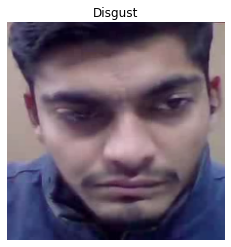

In [ ]:
from IPython import display

source_path=os.path.join(DATA_DIR,'validation')
video_path=os.path.join(source_path, 'subject_20_Vid_1.avi')
print(video_path)
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = 0
prev_b=None
counter=0
n_frames=1
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))//n_frames
print('total_frames:',total_frames)
frames=[]
for frame_count in range(n_frames,n_frames*(total_frames+1),n_frames):
    cap.set(cv2.CAP_PROP_POS_FRAMES,frame_count)
    ret, frame_bgr = cap.read()
    if not ret:
        #cap.release()
        #break
        continue
    frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
    frames.append(frame)
    if len(frames)>=64:
        imgs,prev_b,counter=get_faces(frames,prev_b,counter,frame_count)
        if len(imgs)>0:        
            features = feature_extractor_model(torch.stack([np_transforms(img) for img in imgs], dim=0).to(device))
            features=features.data.cpu().numpy()
            probabs=get_probab(features)
            emotion_inds=np.argmax(probabs,axis=1)
            print(probabs.shape,emotion_inds.shape)
            for img,emotion_ind in zip(imgs,emotion_inds):
                display.clear_output(wait=True)
                plt.axis('off')
                title=emotion_ind2label[emotion_ind]
                plt.title(title)
                plt.imshow(img)
                plt.show()
        frames=[]

if len(frames)>0:
    imgs,prev_b,counter=get_faces(frames,prev_b,counter,frame_count)
    if len(imgs)>0:        
        features = feature_extractor_model(torch.stack([np_transforms(img) for img in imgs], dim=0).to(device))
        features=features.data.cpu().numpy()
        probabs=get_probab(features)
        emotion_inds=np.argmax(probabs,axis=1)
        print(probabs.shape,emotion_inds.shape)
        for img,emotion_ind in zip(imgs,emotion_inds):
            display.clear_output(wait=True)
            plt.axis('off')
            title=emotion_ind2label[emotion_ind]
            plt.title(title)
            plt.imshow(img)
            plt.show()
    frames=[]
cap.release()

### Save/load features 

In [21]:
import pickle
USE_ALL_FEATURES=False

MODEL2EMOTIW_FEATURES=model_name+'_aligned.pickle' #'_feat_bgr_emotiw.pickle'
#MODEL2EMOTIW_FEATURES=model_name+'_cropped.pickle'
#MODEL2EMOTIW_FEATURES='enet0_vggface2_pt_feat_emotiw.pickle'
#MODEL2EMOTIW_FEATURES='enet0_affectnet_7_vggface2_new_pt_scores_emotiw.pickle'

print(MODEL2EMOTIW_FEATURES)

enet_b0_8_best_afew_aligned.pickle


In [38]:
if False:
    with open(MODEL2EMOTIW_FEATURES, 'wb') as handle:
        pickle.dump([filename2features_train,filename2features_val], handle, protocol=pickle.HIGHEST_PROTOCOL)

In [7]:
with open(MODEL2EMOTIW_FEATURES, 'rb') as handle:
    filename2features_train,filename2features_val=pickle.load(handle)
print(len(filename2features_train),len(filename2features_val))

147 48


## Visualize 

In [11]:
filename2features_val.keys()

dict_keys(['subject_7_Vid_5', 'subject_9_Vid_6', 'subject_13_Vid_6', 'subject_8_Vid_6', 'subject_7_Vid_3', 'subject_20_Vid_5', 'subject_7_Vid_2', 'subject_1_Vid_2', 'subject_5_Vid_6', 'subject_11_Vid_6', 'subject_1_Vid_4', 'subject_1_Vid_3', 'subject_20_Vid_5_1', 'subject_18_Vid_6', 'subject_22_Vid_5', 'subject_3_Vid_2', 'subject_20_Vid_7', 'subject_16_Vid_6', 'subject_20_Vid_6', 'subject_7_Vid_4', 'subject_31_Vid_6', 'subject_3_Vid_1', 'subject_6_Vid_6', 'subject_14_Vid_6', 'subject_20_Vid_5_2', 'subject_3_Vid_6', 'subject_20_Vid_3', 'subject_3_Vid_5', 'subject_1_Vid_5', 'subject_12_Vid_6', 'subject_3_Vid_3', 'subject_3_Vid_7', 'subject_20_Vid_2', 'subject_20_Vid_1', 'subject_4_Vid_6', 'subject_3_Vid_4', 'subject_7_Vid_1', 'subject_20_Vid_4', 'subject_19_Vid_6', 'subject_15_Vid_6', 'subject_24_Vid_5', 'subject_17_Vid_6', 'subject_25_Vid_5', 'subject_23_Vid_5', 'subject_10_Vid_6', 'subject_2_Vid_6', 'subject_1_Vid_1', 'subject_21_Vid_5'])

In [15]:
from IPython import display
filename='subject_84_Vid_3'

#data_dir=os.path.join(DATA_DIR,'frames/faces/mtcnn_aligned/validation/')
data_dir=os.path.join(DATA_DIR,'frames/faces/mtcnn_aligned/Train/')
features=filename2features_train[filename] #filename2features_val[filename] #
frames_probabs=get_probab(features)
frames_dir=os.path.join(data_dir,filename)
faces_only=[fn for fn in os.listdir(frames_dir) if 'noface' not in fn]
faces_only=sorted(faces_only, key=compare_filenames)

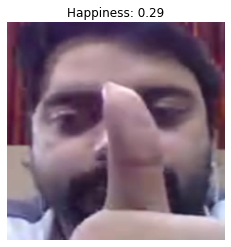

In [16]:
for img_name,probabs in zip(faces_only,frames_probabs):
    img = Image.open(os.path.join(frames_dir,img_name))
    display.clear_output(wait=True)
    plt.axis('off')
    emotion_ind=np.argmax(probabs)
    title=emotion_ind2label[emotion_ind]+": {:.2f}".format(probabs[emotion_ind])
    plt.title(title)
    plt.imshow(img)
    plt.show()

## Classify 

In [17]:
import csv
video2label={}
with open(os.path.join(DATA_DIR,'Engagement_Labels_Engagement.csv'), mode='r') as csvfile:
    labels_reader = csv.reader(csvfile, delimiter='\t')
    for i,row in enumerate(labels_reader):
        if i==0:
            print('first:',row)
            continue
        videoname,label=row[0],float(row[1])
        video2label[videoname]=label
        #print(videoname,label)
        #if (videoname not in filename2features_val) and (videoname not in filename2features_train):
        #    print(videoname,label)

first: ['subject', 'label']


In [18]:
#check if fix is incorrect
video2label['subject_87_Vid_3']=video2label['subject_77_Vid_6']

In [19]:
def compute_descriptor(cur_features):
    #cur_features=cur_features[1000:]
    #cur_features=cur_features[30:-30]
    #mean_features=features.mean(axis=0)
    mean_features = np.mean(cur_features, axis=0)
    std_features = np.std(cur_features, axis=0)
    max_features = np.max(cur_features, axis=0)
    min_features = np.min(cur_features, axis=0)

    # join several features together
    #feature = np.concatenate((mean_features, std_features, min_features, max_features), axis=None)                    
    #feature = np.concatenate((mean_features, std_features, max_features), axis=None)
    #feature = np.concatenate((mean_features, min_features, max_features), axis=None)
    #feature = np.concatenate((mean_features, std_features), axis=None)
    #feature = np.concatenate((max_features, std_features), axis=None)

    feature=std_features
    #feature=mean_features
    #feature=cur_features[-1]
    #feature=np.percentile(cur_features, 100,axis=0)
    return feature

In [22]:
def create_dataset(filename2features):
    x = []
    y = []
    ind=0
    for fn in filename2features:
        features=filename2features[fn]
        total_features=None
        if USE_ALL_FEATURES:
            #prev=features[0].shape
            cur_features=features[0][features[-1]==1]
            #if filename2features_val==filename2features:
            #    print(cur_features.shape)
            #    cur_features=cur_features[2:]
            #print(prev,features.shape)
        else:
            cur_features=features
        
        total_features=compute_descriptor(cur_features)
        if total_features is not None:
            x.append(total_features)
            y.append(video2label[fn])
    x=np.array(x)
    y=np.array(y)
    print(x.shape,y.shape)
    return x,y

x_train, y_train = create_dataset(filename2features_train)
x_test, y_test = create_dataset(filename2features_val)

(147, 1280) (147,)
(48, 1280) (48,)


In [23]:
x_train_norm=preprocessing.normalize(x_train,norm='l2')
x_test_norm=preprocessing.normalize(x_test,norm='l2')

In [24]:
#reg = svm.LinearSVR(C=1) #0.5 1.1
reg = svm.SVR(kernel='rbf')
#np.random.seed(1)
#reg=RandomForestRegressor(n_estimators=100,max_depth=7, n_jobs=-1)

#import xgboost as xgb
#reg = xgb.XGBRegressor(n_estimators=100,use_label_encoder=False)

if False:    
    reg.fit(x_train_norm, y_train)
    y_pred = reg.predict(x_test_norm)
else:
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)

y_pred = np.clip(y_pred, 0,1)
#y_pred[y_pred<0.1]=0
#y_pred[y_pred>0.9]=1
print("MSE:",((y_test-y_pred)**2).mean())

MSE: 0.0777201859768104


In [25]:
float2int={0:0,0.33:1,0.66:2,1:3}
int2float={i:f for (f,i) in float2int.items()}
y_train_int=np.array([float2int[y] for y in y_train])
y_test_int=np.array([float2int[y] for y in y_test])

In [26]:
IC = type('IdentityClassifier', (), {"predict": lambda i : i, "_estimator_type": "classifier"})
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
def plt_conf_matrix(y_true,y_pred,filename=None):
    print(y_pred.shape,y_true.shape, (y_pred==y_true).mean())

    fig, ax = plt.subplots(figsize=(7, 7))
    plot_confusion_matrix(IC, y_pred,y_true,display_labels=['0','0.33','0.66','1'],cmap=plt.cm.Blues,ax=ax) #,normalize='true'
    plt.tight_layout()
    plt.show()

In [27]:
import mord

reg = mord.OrdinalRidge(alpha=0.5) #1

if False:    
    reg.fit(x_train_norm, y_train_int)
    y_pred = reg.predict(x_test_norm)
else:
    reg.fit(x_train, y_train_int)
    y_pred = reg.predict(x_test)
print("MSE:",((y_test_int-y_pred)**2).mean()/9)

y_pred_float=np.array([int2float[y] for y in y_pred])
print("orig MSE:",((y_test-y_pred_float)**2).mean())

MSE: 0.05555555555555555
orig MSE: 0.05626458333333333


(48,) (48,) 0.5


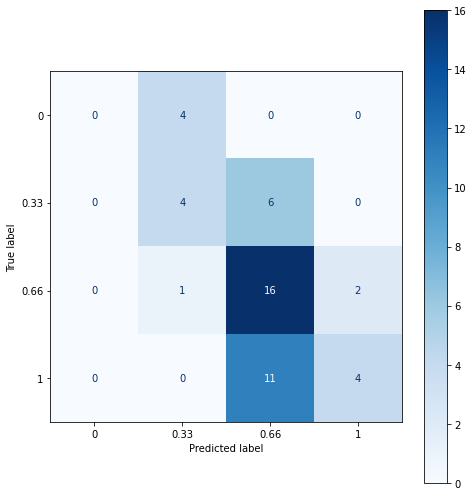

In [28]:
plt_conf_matrix(y_test_int,y_pred)

### Other train-test split 

In [29]:
x_all=np.concatenate((x_train,x_test),axis=0)
y_all=np.concatenate((y_train,y_test),axis=0)
print(x_all.shape,y_all.shape)

labels,counts=np.unique(y_all,return_counts=True)
print(labels,counts)

(195, 1280) (195,)
[0.   0.33 0.66 1.  ] [ 9 45 98 43]


In [30]:
SPLIT_RATIO=0.77 #len(y_train)/len(y_all) #5/6 #0.8
print(SPLIT_RATIO)

0.77


In [31]:
import random
random.seed(7)

def get_train_test_indices():
    inds_train, inds_test = [], []
    inds = np.arange(len(y_all))

    for lbl in np.unique(y_all):
        tmp_inds = inds[y_all == lbl]
        random.shuffle(tmp_inds)
        
        ind=int(len(tmp_inds) * SPLIT_RATIO)
        inds_train.append(tmp_inds[:ind])
        inds_test.append(tmp_inds[ind:])
    
    inds_train = np.concatenate(inds_train, axis=0)
    inds_test = np.concatenate(inds_test, axis=0)
    return inds_train, inds_test

def get_train_test():
    inds_train, inds_test = get_train_test_indices()
    X_train=x_all[inds_train]
    y_train=y_all[inds_train]
    X_test=x_all[inds_test]
    y_test=y_all[inds_test]
    return X_train,y_train,X_test,y_test

x_train_new,y_train_new,x_test_new,y_test_new=get_train_test()
print(x_train_new.shape,y_train_new.shape,x_test_new.shape,y_test_new.shape)
print(np.unique(y_train_new,return_counts=True))
print(np.unique(y_test_new,return_counts=True))

y_train_new_int=np.array([float2int[y] for y in y_train_new])
y_test_new_int=np.array([float2int[y] for y in y_test_new])

(148, 1280) (148,) (47, 1280) (47,)
(array([0.  , 0.33, 0.66, 1.  ]), array([ 6, 34, 75, 33]))
(array([0.  , 0.33, 0.66, 1.  ]), array([ 3, 11, 23, 10]))


In [32]:
reg = mord.OrdinalRidge(alpha=0.5) #1
reg.fit(x_train_new, y_train_new_int)
y_pred = reg.predict(x_test_new)
print("MSE:",((y_test_new_int-y_pred)**2).mean()/9)

y_pred_float=np.array([int2float[y] for y in y_pred])
print("orig MSE:",((y_test_new-y_pred_float)**2).mean())

MSE: 0.0591016548463357
orig MSE: 0.059348936170212786


In [33]:
x_train_new_norm=preprocessing.normalize(x_train_new,norm='l2')
x_test_new_norm=preprocessing.normalize(x_test_new,norm='l2')

In [34]:
#reg = svm.LinearSVR(C=0.5) #0.5 1.1 1.0
reg = svm.SVR(kernel='rbf')
#np.random.seed(1)
#reg=RandomForestRegressor(n_estimators=100,max_depth=10, n_jobs=-1)

#import xgboost as xgb
#reg = xgb.XGBRegressor(n_estimators=100,use_label_encoder=False)

if False:    
    reg.fit(x_train_new_norm, y_train_new)
    y_pred = reg.predict(x_test_new_norm)
else:
    reg.fit(x_train_new, y_train_new)
    y_pred = reg.predict(x_test_new)

y_pred = np.clip(y_pred, 0,1)
#y_pred[y_pred<0.1]=0
#y_pred[y_pred>0.9]=1
print("MSE:",((y_test_new-y_pred)**2).mean())

MSE: 0.054357857229250996


In [35]:
random.seed(7)
np.random.seed(1)

NUM_TESTS=100
regressors={'ridge (int)':mord.OrdinalRidge(alpha=0.5), #0.5 #1
            'svr rbf':svm.SVR(kernel='rbf'),
            'svr linear':svm.LinearSVR(C=0.5),
            'rf':RandomForestRegressor(n_estimators=100,max_depth=7, n_jobs=-1),
           }
reg2MSEs={reg_name:[] for reg_name in regressors.keys()}
for _ in range(NUM_TESTS):
    x_train_new,y_train_new,x_test_new,y_test_new=get_train_test()
    y_train_new_int=np.array([float2int[y] for y in y_train_new])
    y_test_new_int=np.array([float2int[y] for y in y_test_new])
    for reg_name,reg in regressors.items():
        if reg_name.endswith('(int)'):
            reg.fit(x_train_new, y_train_new_int)
            y_pred = reg.predict(x_test_new)
            y_pred=np.array([int2float[y] for y in y_pred])
        else:
            reg.fit(x_train_new, y_train_new)
            y_pred = reg.predict(x_test_new)
            y_pred = np.clip(y_pred, 0,1)
        
        mse=((y_test_new-y_pred)**2).mean()
        #print(reg_name,mse)
        reg2MSEs[reg_name].append(mse)

for reg_name,MSEs in reg2MSEs.items():
    print(reg_name,np.mean(MSEs),np.std(MSEs))

ridge (int) 0.0521188510638298 0.007089241123211507
svr rbf 0.0510496096884753 0.0062436253668110096
svr linear 0.05094895134921972 0.006776527403010952
rf 0.05162876095893995 0.005602720594731017


------------------

In [36]:
filenames_all=list(filename2features_train.keys())+list(filename2features_val.keys())
print(len(filenames_all))

random.seed(7)
inds_train, inds_val = get_train_test_indices()

def get_filename2features_new(inds):
    filename2features_new={}
    for ind in inds:
        filename=filenames_all[ind]
        if filename in filename2features_train:
            filename2features_new[filename]=filename2features_train[filename]
        else:
            filename2features_new[filename]=filename2features_val[filename]
    print(len(filename2features_new))
    return filename2features_new
filename2features_train_new=get_filename2features_new(inds_train)
filename2features_val_new=get_filename2features_new(inds_val)

195
148
47


# Sequence

In [38]:
CONCATENATE_STAT=True
stat_function=np.std
CONVERT2INT=False

In [39]:
if False:
    file2feat_train,file2feat_val=filename2features_train,filename2features_val
else:
    file2feat_train,file2feat_val=filename2features_train_new,filename2features_val_new

In [40]:
from tensorflow.keras.models import load_model,Model
class SaveBestModel(tf.keras.callbacks.Callback):
    def __init__(self, save_best_metric='val_loss', this_max=False):
        self.save_best_metric = save_best_metric
        self.max = this_max
        if this_max:
            self.best = float('-inf')
        else:
            self.best = float('inf')

    def on_epoch_end(self, epoch, logs=None):
        metric_value = logs[self.save_best_metric]
        if self.max:
            if metric_value > self.best:
                self.best = metric_value
                self.best_model_weights = self.model.get_weights()

        else:
            if metric_value < self.best:
                self.best = metric_value
                self.best_model_weights = self.model.get_weights()

In [41]:
def print_mse(model,filename2features):
    diff_correct,num_total=0.0,0
    for fn in filename2features:
        features=filename2features[fn]
        total_features=None
        if USE_ALL_FEATURES:
            x=features[0][features[-1]==1]
        else:
            x=features
        max_ind=len(x)-IMAGE_SET_SIZE
        if max_ind<=0:
            continue
        if CONCATENATE_STAT:
            stat_x=np.repeat(stat_function(x,axis=0).reshape((1,-1)),len(x),axis=0)            
            preds=model.predict(np.expand_dims(np.concatenate((stat_x,x),axis=1), axis=0))[0]
        else:
            preds=model.predict(np.expand_dims(x, axis=0))[0]
        #print(preds.shape,preds,video2label[fn])
        if CONVERT2INT:
            pred=int2float[np.argmax(preds)]
        else:
            pred=preds[0]
        diff_correct+=(pred-video2label[fn])**2
        num_total+=1
    print(num_total,diff_correct/num_total)

In [42]:
IMAGE_SET_SIZE=128 #32 #20
def get_samples(filename2features):
    X_subsample,y_subsample=[],[]
    for fn in filename2features:
        features=filename2features[fn]
        total_features=None
        if USE_ALL_FEATURES:
            x=features[0][features[-1]==1]
        else:
            x=features
        max_ind=len(x)-IMAGE_SET_SIZE
        if max_ind<=0:
            continue
        stat_x=stat_function(x,axis=0)
        num_samples=max(max_ind//(IMAGE_SET_SIZE),1)
        for frame_ind in random.sample(range(max_ind),k=num_samples):
            if CONCATENATE_STAT:
                X_current=[np.concatenate((stat_x,x[frame_ind+i])) for i in range(IMAGE_SET_SIZE)]
            else:
                X_current=[x[frame_ind+i] for i in range(IMAGE_SET_SIZE)]
            X_subsample.append(X_current)
            if CONVERT2INT:
                y_subsample.append(float2int[video2label[fn]])
            else:
                y_subsample.append(video2label[fn])
    
 
    X_subsample = np.array(X_subsample)
    y_subsample=np.array(y_subsample)
    print(X_subsample.shape,y_subsample.shape)
    return X_subsample,y_subsample

X_subsample_train,y_subsample_train=get_samples(file2feat_train)
X_subsample_test,y_subsample_test=get_samples(file2feat_val)

(5678, 128, 2560) (5678,)
(2055, 128, 2560) (2055,)


## RNN 

In [43]:
from tensorflow.keras.layers import LSTM,GRU,Input
batch_size=256

inputs = Input(shape=(None,X_subsample_train.shape[2]))
x=GRU(128,return_sequences=False)(inputs)
if CONVERT2INT:
    pred=Dense(len(float2int),activation='softmax')(x)
    modelSeq=Model(inputs=inputs,outputs=pred)
    modelSeq.compile(optimizer=Adam(lr=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    modelSeq.summary()

    save_best_model = SaveBestModel('val_accuracy',True)
else:
    #pred=Dense(1,activation='sigmoid')(x)
    pred=Dense(1,activation='sigmoid',kernel_regularizer=tf.keras.regularizers.l2(1.0/batch_size))(x)
    modelSeq=Model(inputs=inputs,outputs=pred)
    modelSeq.compile(optimizer=Adam(lr=1e-4), loss='mse', metrics=['mae'])
    modelSeq.summary()

    save_best_model = SaveBestModel('val_loss',False)

modelSeq.fit(X_subsample_train,y_subsample_train, batch_size=batch_size, epochs=20, verbose=1, callbacks=[save_best_model],
             validation_data=(X_subsample_test,y_subsample_test))
best_model_weights = save_best_model.best_model_weights
print(save_best_model.best)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, 2560)]      0         
_________________________________________________________________
gru (GRU)                    (None, 128)               1032960   
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,033,089
Trainable params: 1,033,089
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
23/23 [==============================] - 7s 179ms/step - loss: 0.0882 - mae: 0.2258 - val_loss: 0.0945 - val_mae: 0.2289
Epoch 2/20
23/23 [==============================] - 3s 115ms/step - loss: 0.0586 - mae: 0.1775 - val_loss: 0.0847 - val_mae: 0.2239
Epoch 3/20
23/23 [==============================] - 3s 117ms/step - loss: 0.0448 - mae: 0.1560 - val_loss: 0.0806 - v

In [44]:
print_mse(modelSeq,file2feat_val)
modelSeq.set_weights(best_model_weights)
print_mse(modelSeq,file2feat_val)

47 0.07781394190059297
47 0.05431346238124553


## Attention 

In [45]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Dropout, Dense, Activation, Concatenate, Reshape
from tensorflow.keras.layers import Flatten, RepeatVector, Permute, TimeDistributed
from tensorflow.keras.layers import Multiply, Lambda, Softmax

FEATURE_VECTOR_DIM=X_subsample_train.shape[-1]
print(FEATURE_VECTOR_DIM)

2560


In [46]:
inputs = Input(shape=(None, FEATURE_VECTOR_DIM),name='image_set')  # (batch, samples, features)
e = Dense(1, activation='linear', name='e')(inputs)
e = Reshape([-1], name='alignment')(e)
alpha = Activation('softmax', name='alpha')(e)

alpha_repeated = Permute([2, 1],name='alpha_repeated')(RepeatVector(FEATURE_VECTOR_DIM, name='repeat')(alpha))

c = Multiply(name='c')([inputs, alpha_repeated])
x = Lambda(lambda xin: K.sum(xin, axis=1), output_shape=(FEATURE_VECTOR_DIM,), name='context')(c)

#x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu', name='hidden_FC')(x)  # (batch, units) #128 64
#x = tf.keras.activations.gelu(Dense(512, activation='linear')(x))

In [47]:
if CONVERT2INT:
    pred=Dense(len(float2int),activation='softmax')(x)
    modelAtn=Model(inputs=inputs,outputs=pred)
    modelAtn.compile(optimizer=Adam(lr=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    modelAtn.summary()

    save_best_model = SaveBestModel('val_accuracy',True)
else:
    pred=Dense(1,activation='sigmoid')(x)
    modelAtn=Model(inputs=inputs,outputs=pred)
    modelAtn.compile(optimizer=Adam(lr=1e-4), loss='mse', metrics=['mae'])
    modelAtn.summary()

    save_best_model = SaveBestModel('val_loss',False)

modelAtn.fit(X_subsample_train,y_subsample_train, batch_size=64, epochs=20, verbose=1, callbacks=[save_best_model],
             validation_data=(X_subsample_test,y_subsample_test))
best_model_weights = save_best_model.best_model_weights
print(save_best_model.best)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image_set (InputLayer)          [(None, None, 2560)] 0                                            
__________________________________________________________________________________________________
e (Dense)                       (None, None, 1)      2561        image_set[0][0]                  
__________________________________________________________________________________________________
alignment (Reshape)             (None, None)         0           e[0][0]                          
__________________________________________________________________________________________________
alpha (Activation)              (None, None)         0           alignment[0][0]                  
____________________________________________________________________________________________

In [48]:
print_mse(modelAtn,file2feat_val)
modelAtn.set_weights(best_model_weights)
print_mse(modelAtn,file2feat_val)
#51 0.04833589804423626

47 0.05944726246491419
47 0.05441490147802574
